# Tesla (TSLA) Stock Price prediction using Facebook Prophet

## Importing libraries

In [32]:
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet
import yfinance as yf

In [33]:
# Initializing Plotly
import plotly.io as pio
pio.renderers.default = "colab"

## EDA

In [34]:
ticker ='TSLA'

data=yf.download(ticker, start='2023-10-01', end='2024-10-01')

df=pd.DataFrame(data)
print(df.head())

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-02  244.809998  254.279999  242.619995  251.600006  251.600006   
2023-10-03  248.610001  250.020004  244.449997  246.529999  246.529999   
2023-10-04  248.139999  261.859985  247.600006  261.160004  261.160004   
2023-10-05  260.000000  263.600006  256.250000  260.049988  260.049988   
2023-10-06  253.979996  261.649994  250.649994  260.529999  260.529999   

               Volume  
Date                   
2023-10-02  123810400  
2023-10-03  101985300  
2023-10-04  129721600  
2023-10-05  119159200  
2023-10-06  117947000  


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-10-02 to 2024-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [36]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,209.078845,213.355418,204.888406,209.146693,209.146693,1.017055e+08
std,30.834900,31.447816,30.232150,30.916489,30.916489,3.030380e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,5.086970e+07
25%,181.900002,184.419998,176.959999,180.000000,180.000000,7.958875e+07
50%,210.000000,214.800003,205.770004,208.800003,208.800003,1.006153e+08
75%,235.425003,240.245003,232.230003,237.450005,237.450005,1.186076e+08
max,266.200012,271.000000,260.899994,263.619995,263.619995,2.438697e+08


## Data visualization of the historical performance


In [37]:
px.area(df, x=df.index, y='Close', title='Tesla Stock Price')

In [38]:
px.line(df, x=df.index, y='Close', title='Tesla Stock Price')

In [39]:
px.area(df, x=df.index, y='Volume', title='Tesla Stock Volume')

In [40]:
px.box(df, y='Close', title='Tesla Stock Price Distribution')

In [41]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400
2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600
2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200
2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000
...,...,...,...,...,...,...
2024-09-24,254.080002,257.190002,249.050003,254.270004,254.270004,88491000
2024-09-25,252.539993,257.049988,252.279999,257.019989,257.019989,65034300
2024-09-26,260.600006,261.750000,251.529999,254.220001,254.220001,67142200


## Facebook Prophet Model

In [43]:
# Data preparation
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-02,244.809998,254.279999,242.619995,251.600006,251.600006,123810400
1,2023-10-03,248.610001,250.020004,244.449997,246.529999,246.529999,101985300
2,2023-10-04,248.139999,261.859985,247.600006,261.160004,261.160004,129721600
3,2023-10-05,260.000000,263.600006,256.250000,260.049988,260.049988,119159200
4,2023-10-06,253.979996,261.649994,250.649994,260.529999,260.529999,117947000
...,...,...,...,...,...,...,...
246,2024-09-24,254.080002,257.190002,249.050003,254.270004,254.270004,88491000
247,2024-09-25,252.539993,257.049988,252.279999,257.019989,257.019989,65034300
248,2024-09-26,260.600006,261.750000,251.529999,254.220001,254.220001,67142200
249,2024-09-27,257.380005,260.700012,254.119995,260.459991,260.459991,70988100


In [44]:
columns=['Date', 'Close']
ndf=pd.DataFrame(df, columns=columns)
ndf

,Date,Close
0,2023-10-02,251.600006
1,2023-10-03,246.529999
2,2023-10-04,261.160004
3,2023-10-05,260.049988
4,2023-10-06,260.529999
...,...,...
246,2024-09-24,254.270004
247,2024-09-25,257.019989
248,2024-09-26,254.220001
249,2024-09-27,260.459991


In [45]:
prophet_df=ndf.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2023-10-02,251.600006
1,2023-10-03,246.529999
2,2023-10-04,261.160004
3,2023-10-05,260.049988
4,2023-10-06,260.529999
...,...,...
246,2024-09-24,254.270004
247,2024-09-25,257.019989
248,2024-09-26,254.220001
249,2024-09-27,260.459991


In [46]:
# Creating the model
m= Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps9fud1te/_9kmxwwb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps9fud1te/lerwszin.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82338', 'data', 'file=/tmp/tmps9fud1te/_9kmxwwb.json', 'init=/tmp/tmps9fud1te/lerwszin.json', 'output', 'file=/tmp/tmps9fud1te/prophet_modelbe9ky0en/prophet_model-20241009095154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:51:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:51:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Forecasting

In [48]:
future= m.make_future_dataframe(periods=30)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-10-02,247.175643,222.245246,267.470822,247.175643,247.175643,-1.280729,-1.280729,-1.280729,-1.280729,-1.280729,-1.280729,0.0,0.0,0.0,245.894914
1,2023-10-03,246.919597,225.664409,270.333139,246.919597,246.919597,0.548311,0.548311,0.548311,0.548311,0.548311,0.548311,0.0,0.0,0.0,247.467909
2,2023-10-04,246.663551,225.255600,270.642643,246.663551,246.663551,0.297700,0.297700,0.297700,0.297700,0.297700,0.297700,0.0,0.0,0.0,246.961251
3,2023-10-05,246.407505,221.558085,267.177843,246.407505,246.407505,-1.845194,-1.845194,-1.845194,-1.845194,-1.845194,-1.845194,0.0,0.0,0.0,244.562312
4,2023-10-06,246.151459,221.291737,267.814320,246.151459,246.151459,-1.738768,-1.738768,-1.738768,-1.738768,-1.738768,-1.738768,0.0,0.0,0.0,244.412691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2024-10-26,255.158823,236.503399,280.708170,253.694076,256.586345,2.009341,2.009341,2.009341,2.009341,2.009341,2.009341,0.0,0.0,0.0,257.168164
277,2024-10-27,255.613527,234.450300,282.223167,254.051398,257.139347,2.009339,2.009339,2.009339,2.009339,2.009339,2.009339,0.0,0.0,0.0,257.622866
278,2024-10-28,256.068231,231.551081,279.771617,254.428055,257.695404,-1.280729,-1.280729,-1.280729,-1.280729,-1.280729,-1.280729,0.0,0.0,0.0,254.787502
279,2024-10-29,256.522935,234.690648,279.845179,254.782979,258.261232,0.548311,0.548311,0.548311,0.548311,0.548311,0.548311,0.0,0.0,0.0,257.071246


In [49]:
px.line(forecast, x='ds', y='yhat', title='Tesla Stock Price Forecast')

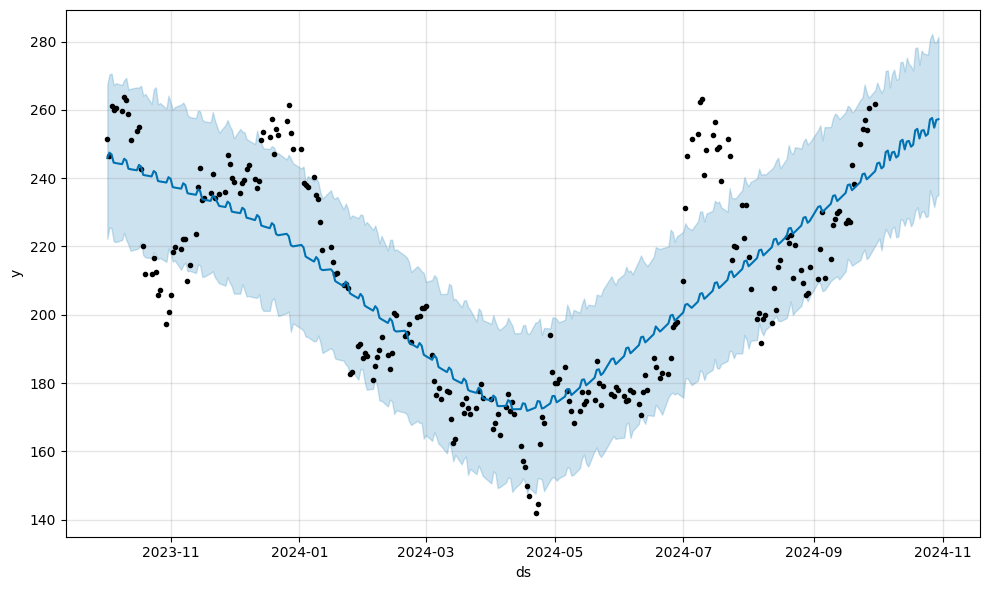

In [50]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

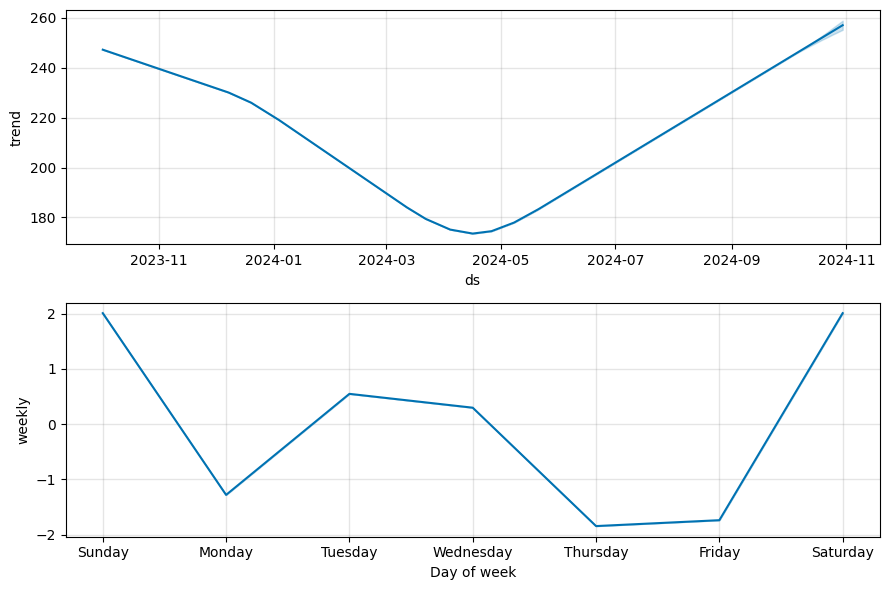

In [51]:
figure2=m.plot_components(forecast)

## Download Forecast data

In [52]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>